# What to do
 - Familiarize yourself with hashed fingerprints, again if you haven't already :) On top of lecture materials, good resources are the [ChemAxon docs](https://docs.chemaxon.com/display/docs/Extended+Connectivity+Fingerprint+ECFP) and [Daylight docs](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html). Some additional information on fingerprint designing and hashing is in the "hashed fingerprint" section of the [ChemAxon docs](https://docs.chemaxon.com/display/docs/Chemical_Hashed_Fingerprint.html). A very good overview is in Greg Landrum's [London RDKit UGM presentation](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf).
 - Characterize your ligand set using ECFP type of fingerprints, preferably radius 2, size 1024.
 - Characterize the DrugBank database using the same fingerprint type
 - Identify in which ECFP bits does your ligand set differ from the DrugBank contents
 - Try to identify the structural fragments that set those most differing bits in your ligand set compared to DrugBank
 - Any thoughts/comments on the fragments that appear significantly more or less in your ligand set compared to DrugBank?

# Fingerprints

Alternativním přístupem není pozorovat daný seznam podstruktur, ale přejít o jednu vrstvu abstrakce výše a sledovat všechny strukturní rysy definovaného typu. Můžeme například pozorovat všechny atomy v charakterizované molekule, jejich typy a jejich vzájemnou vzdálenost. Alternativně můžeme také pozorovat okolí každého atomu v charakterizované molekule, až do vzdálenosti 2 nebo 3 vazeb. To je základem stále populárnějších circular fingerprints (tj. „Kruhu“ s poloměrem 2 nebo 3 vazeb kolem každého atomu), zejména otisků prstů Extended Connectivity Fingerprints (ECFP). Další informace o Extended Connectivity Fingerprints ECFP a jejich použití jsou v dokumentech [ChemAxon docs](https://docs.chemaxon.com/display/docs/Extended+Connectivity+Fingerprint+ECFP) a [Daylight docs](https://www.daylight.com/dayhtml/doc/theory/theory.finger.html).

![ECFP_radii](../data/pix/ecfp_iterations.png)
![ECFP_generation](../data/pix/ecfp_generation.png)

Jak si asi dokážete představit, množství pozorovaných znaků v takových fingerprints bude velmi velké. Kombinačně řečeno, existuje velmi mnoho možných podstruktur se 4 až 6 vazbami napříč a každá molekula bude obsahovat jen velmi malou podmnožinu z nich. Velký počet pozorovaných rysů lze vložit do lépe ovladatelné velikosti pomocí [hash function](https://en.wikipedia.org/wiki/Hash_function), která mapuje velké množství rysů do binárního vektoru spravovatelných délek (obvykle 512, 1024, 2048, někdy 4096 bitů). Po hašování každému rysu je přiřazený bit ve fingerprintu. Vzhledem k tomu, že existuje více rysů než dostupných bitů, lze na jeden bit mapovat mnoho různých rysů. Přítomnost jednoho nebo více z těchto rysů je převede na True - „bitovou kolizi“ při hašování. V praxi to není tak velký problém, protože jednotlivé molekuly nemají tolik rysů k zahashování. Více pozorovaných rysů a kratších délek bitových vektorů způsobí vyšší rychlost kolize a naopak. U poloměrů ECFP 2 a 3, velmi běžného typu fingerprintů, mají bitové velikosti 1024 a 2048 tendenci fungovat dobře.

![ECFP_hashing](../data/pix/ecfp_folding.png)

Naštěstí nemusíte dělat každý popsaný krok generování fingerprintů, protože fingerprinty jsou již implementovány v cheminformatických knihovnách a nástrojích, včetně RDKit.

Kvůli hašování, pokud chcete zpětně vědět, jaké přesné vlastnosti odpovídají konkrétnímu bitu, který vás zajímá, budete muset znovu spustit generování otisků prstů pro vaši sadu molekul. O to se pokusíme také v tomto cvičení :)

In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import csv
import pandas as pd

**Načtení množiny ligandů pro COX1**

In [5]:
raw_df = pd.read_csv('data/cyclooxygenase_1.csv', sep=';') 
raw_df.head()

# odstraneni dat, ktere nemaji IC50 nebo maji jinou jednotku nez nM,
# tim se odstrani data, ktere nemaji Smiles
df = raw_df[(raw_df['Standard Units'] == 'nM')]
cox_ligands = [Chem.MolFromSmiles(smiles) for smiles in df['Smiles']]

**Načtení množiny DrugBank**

In [6]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [08:32:09] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:32:09] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [08:32:09] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:32:10] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:32:10] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [08:32:10] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:32:10] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [08:32:10] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [08:32:10] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [08:32:10] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [08:32:10] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [08:32:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [08:32:12] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [08:32:12] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [08:32:12] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [08:32:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [08:32:12] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [08:32:12] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [08:32:12] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:32:12] ERROR: Could not sanitize molecule ending on line 508068
RDKit ERROR: [08:32:12] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:32:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 

In [7]:
# ECFP are done using RDKit pretty much the same way as MACCS in previous exercise
molecule = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024)
# 2 for radius, 1024 for hashed bit vector length
fp

In [8]:
fp.ToBitString() # write out the bit values in a string
# it is only ethanol, so only several bits are set

'000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Pojďme vypočítat ECFP pro naši ligandovou sadu a DrugBank:

In [9]:
cox_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                     for m in cox_ligands]
# you do your ligand set :)
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugs]

In [14]:
cox_ligands_ecfp

 ...]

Nyní se můžeme podívat na rozdíly v bitovém výskytu mezi naší ligandovou sadou a DrugBank, stejně jako jsme to udělali s klávesami MACCS v předchozích cvičeních:

In [18]:
# a list of zeros of a given length, seznam nul o delce stejne jako fingerprint
cox_ligands_ecfp_sums = [0]*cox_ligands_ecfp[0].GetNumBits()

# celkova suma nastavenych bitu na jednicku pres vsechny molekuly
for key in cox_ligands_ecfp:
    for onbit in key.GetOnBits():
        cox_ligands_ecfp_sums[onbit] += 1
cox_ligands_ecfp_sums

[24,
 292,
 117,
 95,
 324,
 94,
 4,
 50,
 51,
 83,
 127,
 129,
 7,
 144,
 161,
 300,
 18,
 27,
 7,
 68,
 52,
 38,
 24,
 42,
 11,
 264,
 41,
 125,
 4,
 34,
 13,
 188,
 25,
 2548,
 33,
 34,
 341,
 15,
 12,
 77,
 68,
 40,
 78,
 82,
 12,
 183,
 317,
 13,
 8,
 25,
 9,
 32,
 11,
 70,
 145,
 42,
 3,
 89,
 124,
 16,
 131,
 68,
 39,
 125,
 1277,
 26,
 14,
 30,
 30,
 66,
 12,
 131,
 34,
 72,
 46,
 17,
 4,
 43,
 25,
 47,
 1057,
 37,
 73,
 31,
 161,
 54,
 79,
 17,
 46,
 74,
 515,
 4,
 30,
 11,
 163,
 17,
 25,
 21,
 69,
 8,
 19,
 10,
 105,
 99,
 127,
 100,
 41,
 22,
 12,
 60,
 11,
 27,
 106,
 4,
 905,
 10,
 278,
 74,
 114,
 164,
 41,
 216,
 62,
 41,
 29,
 74,
 66,
 18,
 530,
 22,
 58,
 36,
 90,
 94,
 14,
 10,
 1716,
 13,
 182,
 54,
 145,
 72,
 150,
 12,
 44,
 224,
 19,
 767,
 29,
 13,
 22,
 12,
 16,
 52,
 16,
 66,
 8,
 110,
 71,
 41,
 120,
 7,
 151,
 12,
 998,
 112,
 12,
 95,
 35,
 28,
 37,
 128,
 23,
 591,
 10,
 903,
 63,
 108,
 54,
 46,
 78,
 32,
 20,
 2,
 153,
 51,
 7,
 17,
 21,
 44,
 39,
 160,

In [15]:
drugs_ecfp_sums = [0]*drugs_ecfp[0].GetNumBits() # a list of zeros of a given length
for key in drugs_ecfp:
    for onbit in key.GetOnBits():
        drugs_ecfp_sums[onbit] += 1
drugs_ecfp_sums

[120,
 2360,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 665,
 227,
 828,
 103,
 104,
 93,
 187,
 118,
 203,
 63,
 237,
 154,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 159,
 4264,
 155,
 110,
 1076,
 73,
 87,
 207,
 79,
 440,
 648,
 112,
 79,
 261,
 319,
 76,
 52,
 97,
 89,
 123,
 245,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 69,
 179,
 204,
 219,
 2683,
 147,
 55,
 173,
 97,
 226,
 77,
 346,
 179,
 389,
 255,
 465,
 76,
 283,
 134,
 479,
 4939,
 170,
 152,
 122,
 313,
 87,
 270,
 124,
 108,
 105,
 1541,
 90,
 160,
 54,
 308,
 97,
 114,
 158,
 96,
 87,
 61,
 119,
 402,
 60,
 194,
 160,
 246,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 396,
 608,
 349,
 767,
 78,
 767,
 117,
 165,
 82,
 193,
 109,
 47,
 2503,
 89,
 337,
 123,
 98,
 162,
 127,
 52,
 625,
 56,
 515,
 399,
 667,
 59,
 125,
 150,
 289,
 199,
 99,
 2458,
 86,
 79,
 106,
 104,
 370,
 64,
 67,
 126,
 66,
 183,
 282,
 48,
 161,
 45,
 232,
 135,
 134,
 262,
 107,
 98,
 73,
 96,
 130,
 261,
 137,
 202,


Stejně jako v předchozím cvičení jsou velikosti naší sady ligandů a velikost databáze DrugBank odlišné. Proto je dobré jednotlivé počty vydělit celkovým počtem molekul v množině, dostaneme procentuální zastoupení jednotlivých rysů/bitů v množině, to už srovnat lze.

In [24]:
cox_ligands_ecfp_scaled = [x/len(cox_ligands_ecfp) for x in cox_ligands_ecfp_sums]
drugs_ecfp_scaled = [x/len(drugs_ecfp) for x in drugs_ecfp_sums]
drugs_ecfp_scaled

[0.016865776528460996,
 0.33169360505973294,
 0.04005621925509487,
 0.04455375966268447,
 0.1319747013352073,
 0.03246661981728742,
 0.004075895994378074,
 0.019395643007730147,
 0.02993675333801827,
 0.04258608573436402,
 0.036542515811665496,
 0.03626141953619114,
 0.009557273366127899,
 0.09346451159522136,
 0.03190442726633872,
 0.11637385804638088,
 0.014476458186929024,
 0.014617006324666199,
 0.013070976809557273,
 0.026282501756851723,
 0.016584680252986646,
 0.02853127196064652,
 0.008854532677442024,
 0.03330990864371047,
 0.021644413211524948,
 0.022768798313422347,
 0.017849613492621222,
 0.015600843288826423,
 0.00871398453970485,
 0.02965565706254392,
 0.009697821503865073,
 0.024174279690794095,
 0.02234715390021082,
 0.5992972593113142,
 0.02178496134926212,
 0.015460295151089248,
 0.15122979620520027,
 0.010260014054813773,
 0.012227687983134224,
 0.02909346451159522,
 0.011103302881236824,
 0.06184118060435699,
 0.09107519325368939,
 0.015741391426563597,
 0.011103302

Nyní máme v naší sadě a v DrugBank poměr výskytu každého bitu odpovídající rysu/ům. Nyní můžeme tyto počty obou množin od sebe odečíst a podívat se na rozdíly, které bity převažují a v jaké množině.

In [30]:
# compute the differences, store bit numbers prior to sorting
cox_drugbank_differences = [(i, a_b[0] - a_b[1]) 
    for i, a_b in enumerate(zip(cox_ligands_ecfp_scaled, drugs_ecfp_scaled))]
# let's sort the bits by the difference in fingerprint incidence between our ligand set and the DrugBank database
cox_drugbank_differences.sort(key=lambda x: x[1])
cox_drugbank_differences[:3], cox_drugbank_differences[-3:]

([(80, -0.3631306096280976),
  (807, -0.3301999124490304),
  (1, -0.24024355808196907)],
 [(319, 0.4655791976431226),
  (452, 0.48444029114108755),
  (350, 0.4879905731947455)])

Takže v ECFP existují některé bity, které jsou méně časté v sadě ligandů COX než ve známých lécích v Drugbank (negativní rozdíl), a některé, které jsou mnohem častější v sadě ligandů COX (pozitivní rozdíl).

Nejběžnějším bitem mezi COX ligandy ve srovnání s molekulami DrugBank je bit číslo 350. Co tento bit znamená? Na rozdíl od strukturálních klíčů není interpretace tak jednoduchá. Zopakujme fingerprinty COX ligandů, ale tentokrát se konkrétně podívám na bit 350 a podíváme se, jaké substruktury byly na něj mapovány během generování ECFP. Naštěstí pro nás RDKit tuto funkci již má :)

In [31]:
bitinfo = {} # dict to store info about what bits were set by what atoms
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

Zde máme několik bitů nastavených v ECFP fingerprintu ethanolu a vysvětlení nastavených bitů jako index atomu a poloměr příslušných substruktur. Nyní stačí vygenerovat skutečné substruktury z těchto atomových indexů:

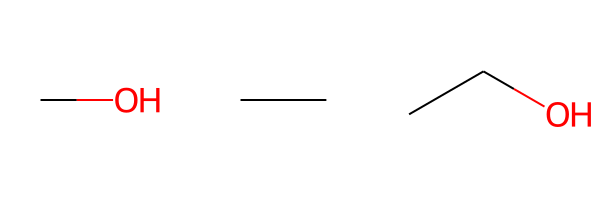

In [32]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0: # radius 0 means just the atom, not useful as path
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols)

Ano, do značné míry Ethanol :) Pomocí této funkce napíšeme obecnou funkci, která získá instanci Mol a bitové číslo, a vyplivne, které fragmenty byly zodpovědné za to, aby byl bit v dané konkrétní molekule nastaven:

In [33]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    hit_atoms = [Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom)
                 for atom, radius in bitinfo.get(bit, [])
                 if radius > 0]
    submols = [Chem.PathToSubmol(mol, ha) for ha in hit_atoms]
    return submols

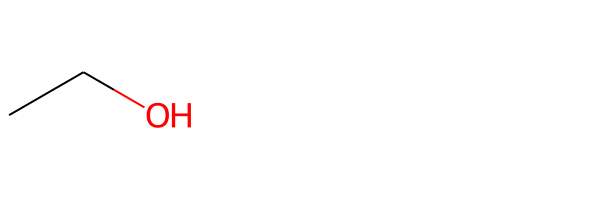

In [34]:
# test the func :)
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(ethanol, 386))

Dobře, zdá se, že funkce funguje ... pojďme zjistit, které substruktury jsou zodpovědné za poměrně častý bit 350 mezi COX ligandy. Děláte nejvíce poměrně častý bit pro vaši ligandovou sadu, na vaší ligandové sadě :)

In [35]:
substructure_smiles = {}

for ligand in cox_ligands:
    for submol in substructures_of_bit_ecfp4_1024(ligand, 350):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'cc(c)C': 58,
 'cc(c)-c(c(-c)[nH])c(C)n': 1,
 'CCCS(N)(=O)=O': 2,
 'cn(-c)cc(C)n': 1,
 'ccnc(c)C': 3,
 'cc(N)c(cn)NC': 6,
 'cc[n+]': 1,
 'NCCCN': 2,
 'C#Cc(cc)c(c)F': 1,
 'cc([N+])cnn': 1}

Zdá se, že 10 odlišných fragmentů mapují na bit 350 mezi COX ligandy; většinou převládá struktura „cc(c)C“ 3 aromatických atomů skládající se uhlíkových atomů, větvících se na nearomatický uhlík. Pojďme se podívat na DrugBank:

In [39]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 350):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'cc(c)C': 35,
 'ccc(c(c)Cl)C(C)C': 2,
 'cc[nH2+]': 24,
 'CCS(C)(=O)=O': 1,
 'NCCCN': 17,
 'cCCN(C)C': 1,
 'ccc(CC)c(c)O': 1,
 'CN[C@](OC)(C(N)=O)[C@@H](C)O': 6,
 'cO[Fe]': 2,
 'nCCCN': 1,
 'cC(C)(C)CC(C)(C)C': 4,
 'cc(C)c(CC)c(c)c': 1,
 'c[nH]c(c(c)C)c(c)[nH]': 1,
 'NOCC(=O)O': 1,
 'CC(C)[NH3+]': 1,
 'cc(C)c(Cl)c(c)Cl': 1,
 'CN[C@H](C(=O)O)C(C)(C)S': 1,
 'CN[C@@H](C(=O)O)C(C)(C)S': 2,
 'CC/C=C/N': 3,
 'C[C@H](N)CO': 2,
 'ccc(c(=O)o)c(c)c': 1,
 'cC(=N)NC(C)=O': 1,
 'CC(C)(C)CC(C)(C)c': 1,
 'CCCS(N)(=O)=O': 3,
 'CCCCC': 1,
 'ccnc(c)C': 2,
 'CC[C@@H](C(C)C)C(C)(C)C': 1,
 'ccc(c(c)C)c(c)c': 1,
 'CC(C)[C@@](O)([C@H](C)O)C(C)(C)O': 2,
 'cc(c)CNn': 1,
 'cc(C)cc(c)[NH3+]': 1,
 'cC(c)(N)S': 2,
 'CCCC(C)=[NH2+]': 1,
 'NCCCn': 1,
 'CN(S)CC(=O)O': 2,
 'ccc(CO)nc': 3,
 'cn(n)C(CC)CC': 3,
 'cc(c)CC(C)c': 1,
 'cc(O)c(c(=O)o)C(c)C': 2,
 'COCC(C)(c)N': 1,
 'cc([nH])C[C@@H](C)[NH-]': 1}

In [40]:
len(substructure_smiles_db)

41

Takže v DrugBank je za tímto bitem nejčastěji přítomný fragment 'ccc(Cl)c(c)Cl', který se v COX ani nevyskytuje. Na druhou stranu, nejvíce převládající fragment pro tento bit v COX, 'cc(c)C', je v DrugBank přítomen 35 krát.

Celkově DrugBank mapuje mnoho dalších fragmentů na 350. Velká část zmapovaných fragmentů, včetně těch nejrozšířenějších, se zdá být spojena s aromatickými heterocykly. Existuje také dobré množství fragmentů s explicitní izomerií.